# Actividad 3.3

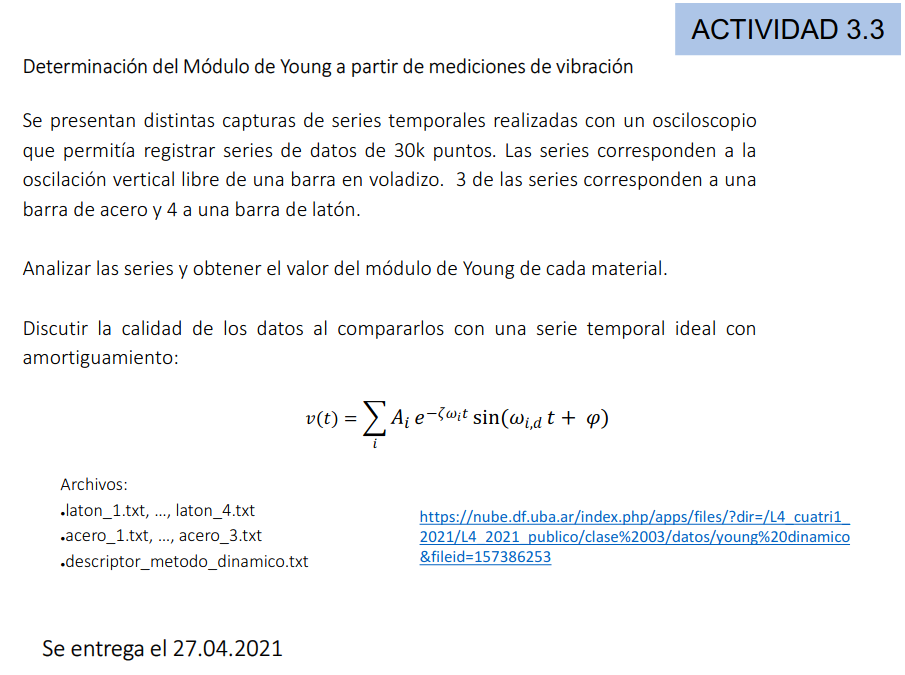

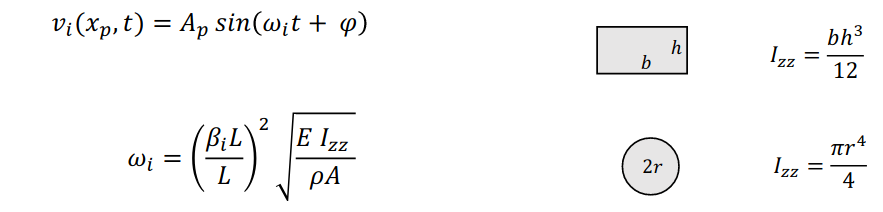

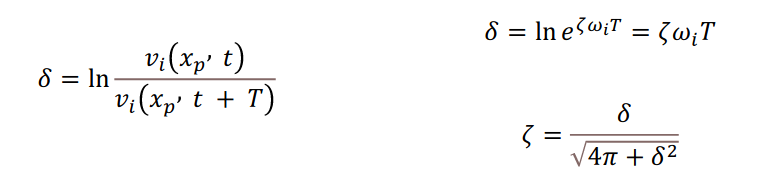

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib
import pint
from scipy import signal
%matplotlib inline

un = pint.UnitRegistry()
Q = un.Quantity

L_l = 255 * un.millimeter #mm logitud
L_a = 240 * un.millimeter#mm longitud

d_l = 4.6 * un.millimeter#mm diametro
d_a = 4.0 * un.millimeter#mm diametro

er_L = 2 * un.millimeter  #mm
er_d = 0.2 * un.millimeter#mm

r_a = 7850 * un.kilogram/(un.meter**3) #km/m^3 densidad
r_l = 8730 * un.kilogram/(un.meter**3)#km/m^3 densidad

E_l = 110e9 * un.pascal# pa
E_a = 200e9 * un.pascal# pa
#A = area transversal entiendo yo $pi*r^2$

bl = [1.875104, 4.694091, 7.854757, 10.99554]  #beta *L

archivos_laton = []
archivos_acero = []
for i in range(3):
    archivos_acero.append(np.loadtxt('acero_'+ str(i+1) +'.txt', skiprows = 4))
    archivos_laton.append(np.loadtxt('laton_'+ str(i+1) +'.txt', skiprows=  4))
archivos_laton.append(np.loadtxt('laton_4.txt', skiprows=  4))

In [3]:
Izz_l = np.pi*((d_l/2)**4)/4
Izz_a = np.pi*((d_a/2)**4)/4
B_l = np.pi*((d_l/2)**2)*r_l #El factor q va dividiendo en w
B_a = np.pi*((d_a/2)**2)*r_a #El factor q va dividiendo en w

#son las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver si bl es igual para ambos o no
    w_l.append((np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2).to(1/un.second)) 
    w_a.append((np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2).to(1/un.second))

In [4]:


#fft_l1 = np.fft.fft((archivos_laton[0][:,1])-np.mean(archivos_laton[0][:,1]))
#frec = np.linspace(min(archivos_laton[0][:,0]), max(archivos_laton[0][:,0]), len(archivos_laton[0][:,0]))
#plt.plot(frec, np.abs(fft_l1))
#plt.axvline(np.array(w_l[0]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[1]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[2]), linestyle = 'dashed', color = 'red')
#plt.axvline(np.array(w_l[3]), linestyle = 'dashed', color = 'red')
#plt.xlim([0,10])

<IPython.core.display.Javascript object>


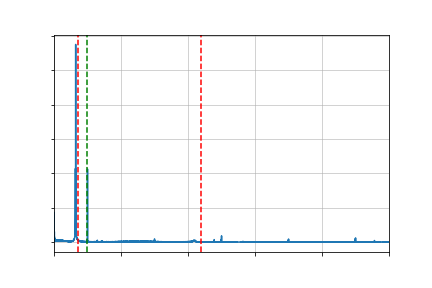

<ipython-input-5-6257f7c43eaa>:41: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:42: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:43: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:44: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')


<IPython.core.display.Javascript object>


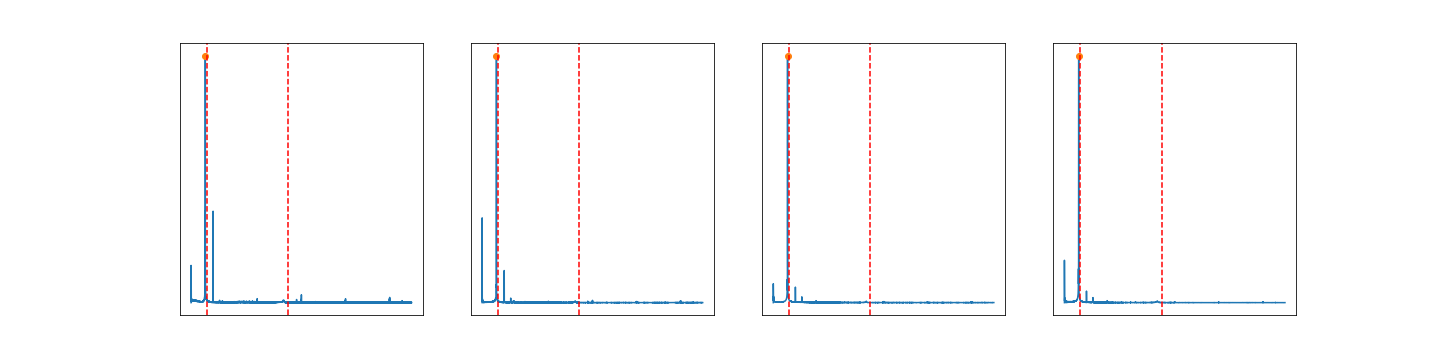

<ipython-input-5-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-5-6257f7c43eaa>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', 

In [5]:
%matplotlib nbagg
t = archivos_laton[0][:,0]
t_u = (Q, 'second')

laton = []
acero = []
for i in range(len(archivos_laton)):
    laton.append(archivos_laton[i][:,1])
    if i<3:
        acero.append(archivos_acero[i][:,1])
        
fft_l = []
fft_a = []
for i in range(len(laton)):
    fft_l.append(np.fft.fft(laton[i]-np.mean(laton[i])))
    if i<3:
        fft_a.append(np.fft.fft(acero[i]-np.mean(acero[i])))

fft_l2 = []
fft_a2 = []
picos_l = []
picos_a = []
for i in range(len(fft_l)):
    fft_l2.append(2/len(t) *np.abs(fft_l[i][:len(t)//2]))
    picos_l.append(signal.find_peaks(np.abs(fft_l2[i])))
    if i<3:
        fft_a2.append(2/len(t) *np.abs(fft_a[i][:len(t)//2]))
        picos_a.append(signal.find_peaks(np.abs(fft_a2[i])))
        
t_m = max(t)/len(t)
frec = np.linspace(0, 1/(t_m*2), int(len(t)/2))
frec_u = Q(frec, '1/second')

#plt.plot(t[1000:10000],laton[0][1000:10000])
plt.figure()
plt.plot(frec, np.abs(fft_l2[0]))
plt.xlim([0,500])
plt.grid(True, alpha=0.7)
plt.xticks(color= 'w')
plt.yticks(color='w')
plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(50,linestyle = 'dashed', color='green')

with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,4, figsize= (20,5))
    #ax[i].set_xticks(color= 'w')
    #ax[i].set_yticks(color='w')
    for i in range(len(fft_l2)):
        ax[i].plot(frec, np.abs(fft_l2[i]))
        ax[i].plot(frec[np.argmax(fft_l2[i])] , max(fft_l2[i]), 'o')
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        plt.show()
        #ax[i].set_xlabel(color ='w')
        #ax[i].tick_params(color='w')
        #ax[i].set_xticks(color= 'w')
        #ax[i].set_yticks(color='w')


<IPython.core.display.Javascript object>


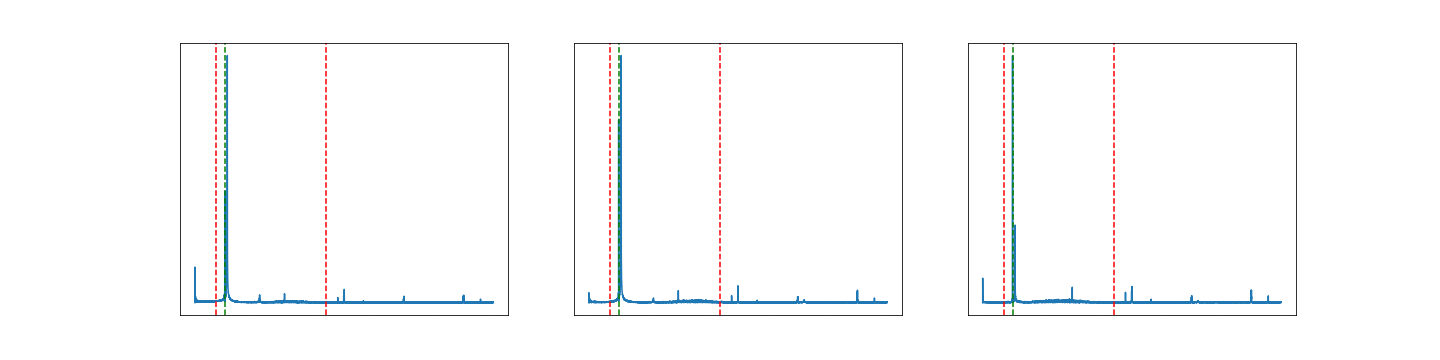

<ipython-input-6-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color

In [6]:
with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,3, figsize= (20,5))
    for i in range(len(fft_a2)):
        ax[i].plot(frec, np.abs(fft_a2[i]))
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(50,linestyle = 'dashed', color='green')


In [7]:
#sin el zeda
w_l_exp = []
w_a_exp = []#w_a_exp[2] modificar
for i in range(len(fft_l2)):
    a = np.argmax(fft_l2[i])
    w_l_exp.append(frec[a])
    if i<3:
        b = np.argmax(fft_a2[i])
        w_a_exp.append(frec[b])
        

E_exp_l = (B_l/Izz_l) * (((np.mean(w_l_exp)*2*np.pi*(1/un.second))*(L_l/bl[0])**2)**2)
#E_exp_a = (B_a/Izz_l) * (((np.mean(w_a_exp)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero geral
E_exp_a = (B_a/Izz_l) * (((((w_a_exp[0]+w_a_exp[1])/2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero solo con los primeros dos w


#E_exp_l.to(un.pascal)/1e9
E_exp_a.to(un.pascal)/1e9


139.89462085700703 <Unit('pascal')>

In [8]:
from scipy.signal import find_peaks

t_2 = archivos_acero[0][:,0][0:10000]
a_2 = []
for i in range(3):
    a_2.append(archivos_acero[i][:,1][0:10000])

t_step = max(t_2)/len(t_2)
frec2 = np.linspace(0, 1/(t_step*2), int(len(t_2)/2))
#frec2 = np.linspace(1/(t_min_2*2), 1/(t_max_2*2), int(len(t_2)/2))
fft_a2_1 = []
fft_a2_2 = []
w_a_exp_2 = []
for i in range(3):
    fft_a2_1.append(np.fft.fft(a_2[i]-np.mean(a_2[i])))
    fft_a2_2.append(2/len(t_2) *np.abs(fft_a2_1[i][:len(t_2)//2]))
    a= np.argmax(fft_a2_2[i])
    w_a_exp_2.append(frec2[a])
    
w_a_exp_2
#ma = np.argmax(fft_a2_2)
#frec2[ma]
#plt.plot(frec2, np.abs(fft_a2_2[0]))
#plt.plot(frec2[ma], max(fft_a2_2[0]), 'ro')
#a, _ = find_peaks(a_2[0], height =2.2)
#cte = np.linspace(2.3, 2.4, len(a[0]))
#plt.plot(archivos_acero[0][:,0][0:10000],archivos_acero[0][:,1][0:10000])
#plt.plot(a, a_2[0][a],'.')
#plt.xlim([4,4.5])
E_exp = (B_a/Izz_l) * (((np.mean(w_a_exp_2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2)
E_exp.to(un.pascal)/1e9
#fft_a2_2[0][a[0]]
#max(np.abs(fft_a2_2[0]))

139.9505961192469 <Unit('pascal')>

## intento hacer el gráfico teórico primero con el laton

<IPython.core.display.Javascript object>


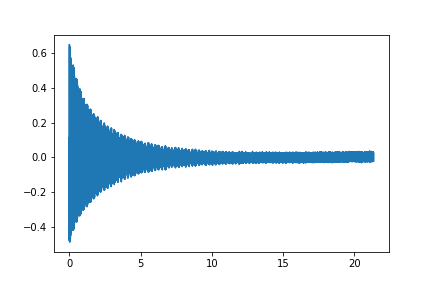

In [39]:
#primero grafico los datos del laton
%matplotlib nbagg
data = np.array(archivos_acero[0])

fig, ax = plt.subplots(1)

t_in=3650
t_fin=25000
data = data[t_in:t_fin,:]
data[:,1] = data[:,1] - np.mean(data[:,1]) #le saco la componente constante a la señal
data[:,0] = data[:,0] - data[0, 0] #le resto el tiempo donde recoté

ax.plot(data[:,0], data[:,1])
plt.show()

<IPython.core.display.Javascript object>


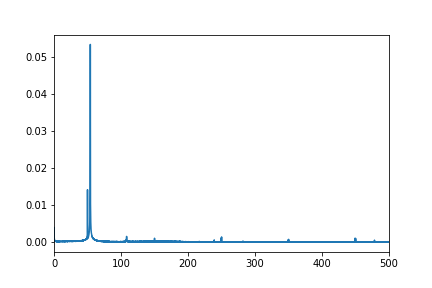

In [40]:
#filtro fourier

t_data = data[:,0]
v_data = data[:,1]

N = len(t_data)
t_max = t_data[-1]

fsamp = N/t_max

v_fft = np.fft.fft(v_data)
v_fft_2 = 2/N * np.abs(v_fft[:N//2])

frecuencia = np.linspace(0, fsamp/2, int(N/2))

fig, ax = plt.subplots()
ax.plot(frecuencia, np.abs(v_fft_2))
ax.set_xlim([0,500])
plt.show()

<IPython.core.display.Javascript object>


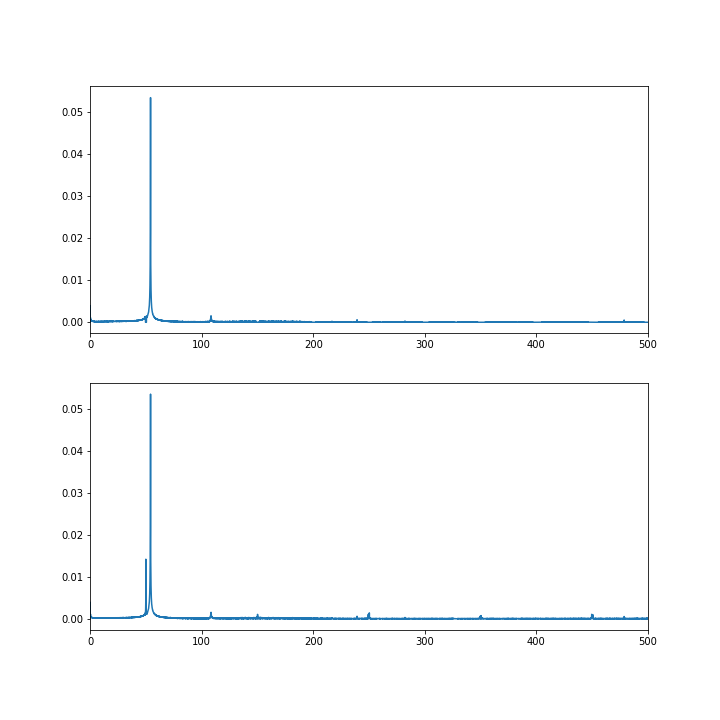

In [49]:
v_fft_filtrado = np.copy(v_fft)
v_fft_2_filtrado = np.copy(v_fft_2)
for n in range(10):
    v_fft_filtrado[1060*(n+1) : 1080*(n+1) ] = 0
    v_fft_2_filtrado[1060*(n+1) : 1080*(n+1)] = 0

fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(frecuencia, np.abs(v_fft_2_filtrado))
ax[1].plot(frecuencia, np.abs(v_fft_2))
ax[0].set_xlim([0,500])
ax[1].set_xlim([0,500])
plt.show()

<IPython.core.display.Javascript object>


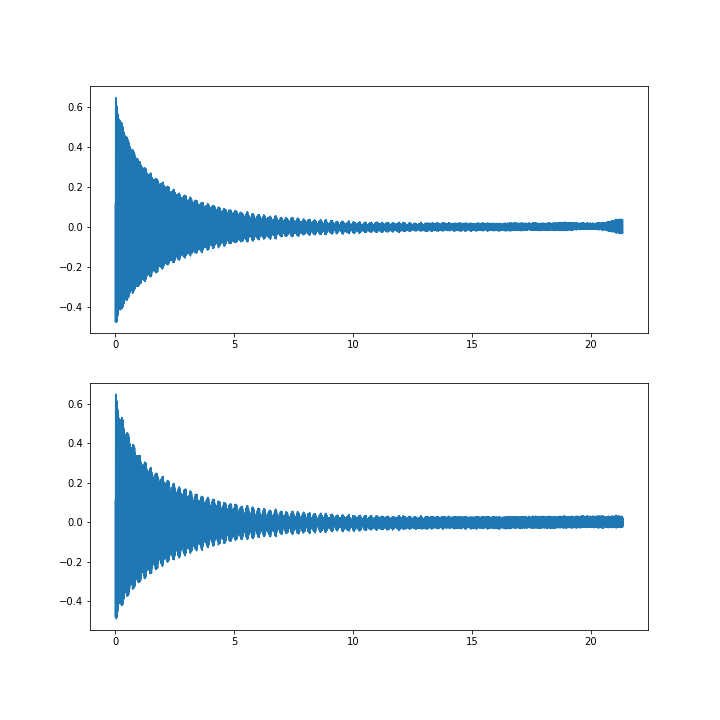

/home/dina/environments/labo_4/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [50]:
anti_transf_filt = np.fft.ifft(v_fft_filtrado)
anti_transf = np.fft.ifft(v_fft)

fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].plot(t_data, anti_transf_filt)
ax[1].plot(t_data, v_data)
plt.show()

In [58]:

def v(t, A, w, fi, seda):
    v = np.zeros(t.size)
    for i in range(len(A)):
        v = v + A[i] * np.sin(w[i] * t + fi[i]) * np.exp(-seda * w[i] * t)
        break
    amp_luz = 0.015 * un.volts
    w_luz = 50 / un.second
    v = v + amp_luz * np.sin(2*np.pi * w_luz * t + 2 * np.pi/5)
    return v

tstep = 0.00001
t = np.linspace(0, 20, int(1/tstep)) * un.second
fi = [0,0,0,0] * un.radian
A = np.array([0.48,0,0,0]) * un.volts

w = w_l
w.append(1 / un.second)
seda = 0.0018

w = np.array(w, dtype=object) * (1 - seda * np.ones(len(w)))
v = v(t, A, w, fi, seda)



<ipython-input-58-47e886ba2e2a>:20: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  w = np.array(w, dtype=object) * (1 - seda * np.ones(len(w)))


<IPython.core.display.Javascript object>


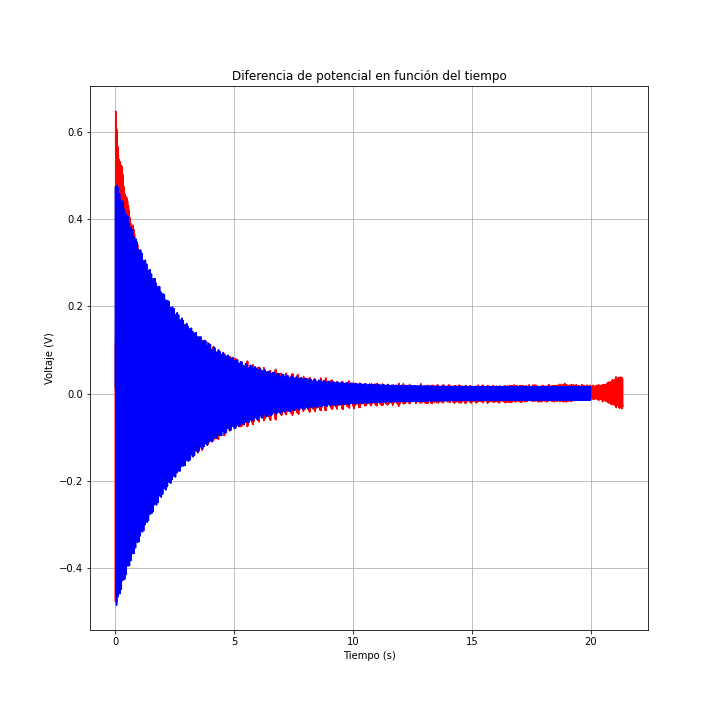

<ipython-input-59-e63e94e2863d>:4: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  t_graf = np.array(t)
<ipython-input-59-e63e94e2863d>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v_graf = np.array(v) #+ offset
/home/dina/environments/labo_4/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [59]:
%matplotlib nbagg
fig, ax = plt.subplots(1, figsize=(10,10))

t_graf = np.array(t)
v_graf = np.array(v) #+ offset

ax.plot(t_data, anti_transf_filt, 'red')
#ax.plot(t_data, anti_transf, 'red')
ax.plot(t_graf, v_graf, 'blue')
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Voltaje (V)")
ax.grid()
ax.set_title("Diferencia de potencial en función del tiempo")
plt.show()
